In [1]:
#pip install --upgrade pip

In [2]:
#pip install vaderSentiment

In [3]:
#pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv(r"C:\Users\Kishore\OneDrive\Desktop\Total Machine Learning\CSV Files\sentimentdataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [6]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values})
null_count()

,features,dtypes
0,Unnamed: 0.1,int64
1,Unnamed: 0,int64
2,Text,object
3,Sentiment,object
4,Timestamp,object
5,User,object
6,Platform,object
7,Hashtags,object
8,Retweets,float64
9,Likes,float64


In [7]:
# drop column Unnamed: 0.1
df.drop(columns='Unnamed: 0.1',inplace=True)

In [8]:
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [9]:
df.isnull().sum()

Id           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [10]:
df.dtypes

Id             int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Id', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [13]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Id: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [14]:
## drop Columns

In [15]:
##df = df.drop(columns=['Id', 'Hashtags','Day', 'Hour','Sentiment'])

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [17]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

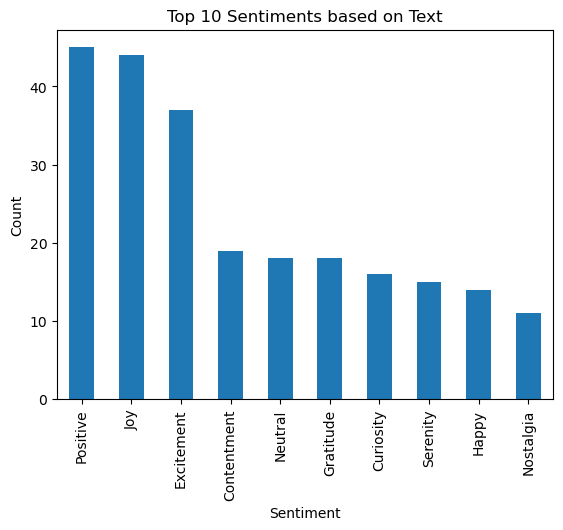

In [18]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [19]:
df['Platform'].value_counts()

Instagram    258
Twitter      243
Facebook     231
Name: Platform, dtype: int64

In [20]:
#df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
#plt.title('Percentages of Platforms')
#plt.legend()
#plt.show()

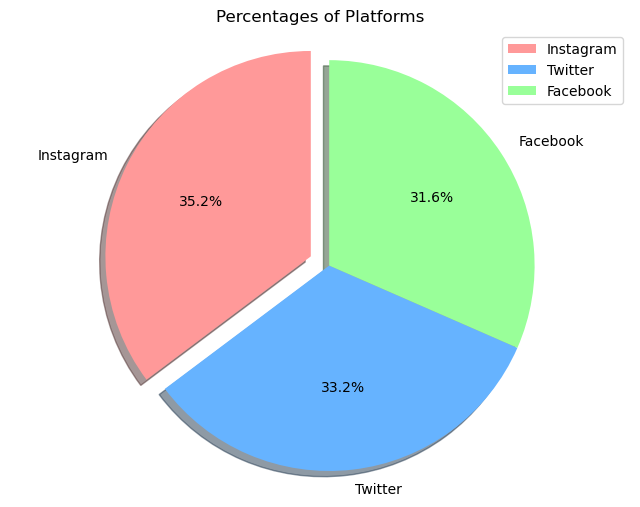

In [21]:
# Get the value counts of 'Platform' column
platform_counts = df['Platform'].value_counts()

# Define colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Define explode to highlight the first platform
explode = [0.1 if i == 0 else 0 for i in range(len(platform_counts))]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True, explode=explode)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Percentages of Platforms')
plt.legend(platform_counts.index, loc="best")
plt.show()


In [22]:
#df['Country'].value_counts().nlargest(10).plot(kind='bar')
#plt.title('Top 10 Country')
#plt.legend()
#plt.show()

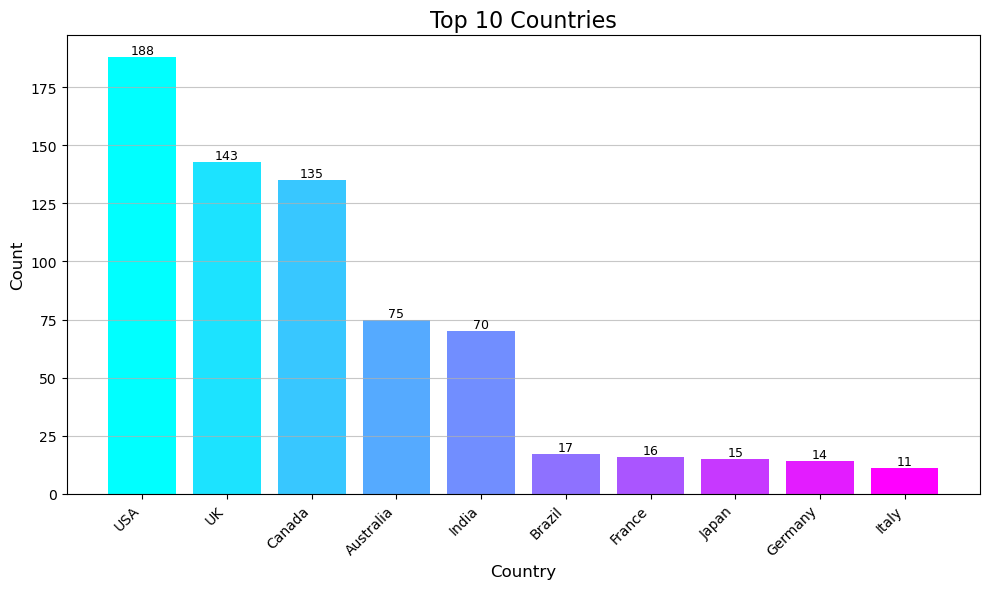

In [23]:
# Get the top 10 countries by value counts
top_countries = df['Country'].value_counts().nlargest(10)

# Define colors for the bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a color gradient
gradient = np.linspace(0, 1, len(top_countries))
colors = plt.cm.cool(gradient)

# Create the bar chart with enhanced aesthetics
plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries.index, top_countries.values, color=colors)

# Add title and labels
plt.title('Top 10 Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize ticks and grid lines
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             round(bar.get_height(), 2), ha='center', va='bottom', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


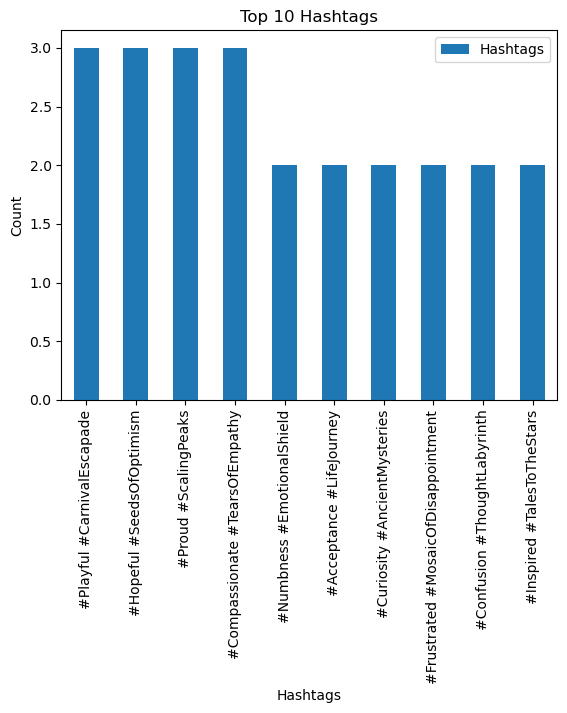

In [24]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [25]:
# Describe data numerical
df.describe()

,Id,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [26]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


### Platform Top liked by Users ? 

In [27]:
#top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
#top_likes_platform.plot(kind='bar')
#plt.title('Top Platforms by Total Likes')
#plt.xlabel('Platform')
#plt.ylabel('Total Likes')
#plt.show()

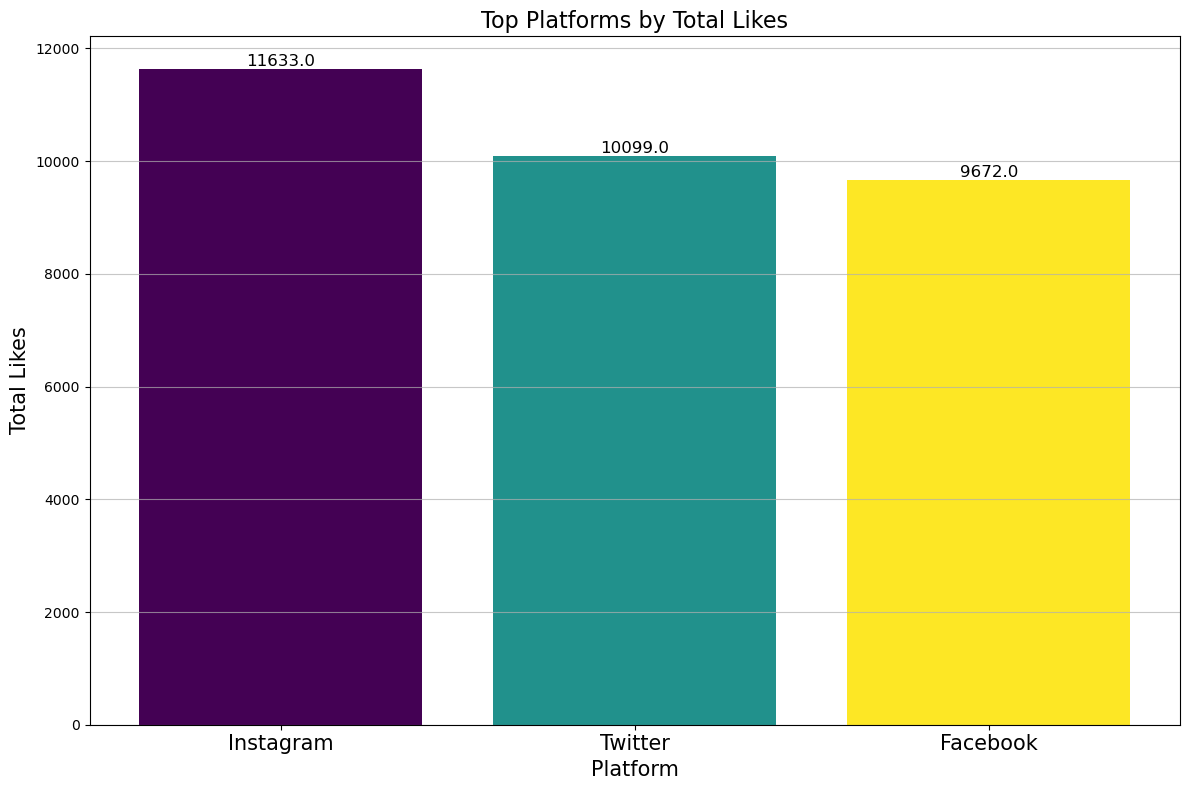

In [28]:

# Group by 'Platform' and calculate the sum of 'Likes', then select the top 10 platforms
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)

# Create a color gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(top_likes_platform)))

# Create the bar chart with enhanced aesthetics
plt.figure(figsize=(12, 8))
bars = plt.bar(top_likes_platform.index, top_likes_platform.values, color=colors)

# Add title and labels
plt.title('Top Platforms by Total Likes', fontsize=16)
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Total Likes', fontsize=15)

# Customize ticks and grid lines
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             round(bar.get_height(), 2), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Most Country Liked posts 

In [29]:
#top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
#top_country_likes.plot(kind='bar')
#plt.title('Top country likes')
#plt.xlabel('Country')
#plt.ylabel('count')
#plt.show()

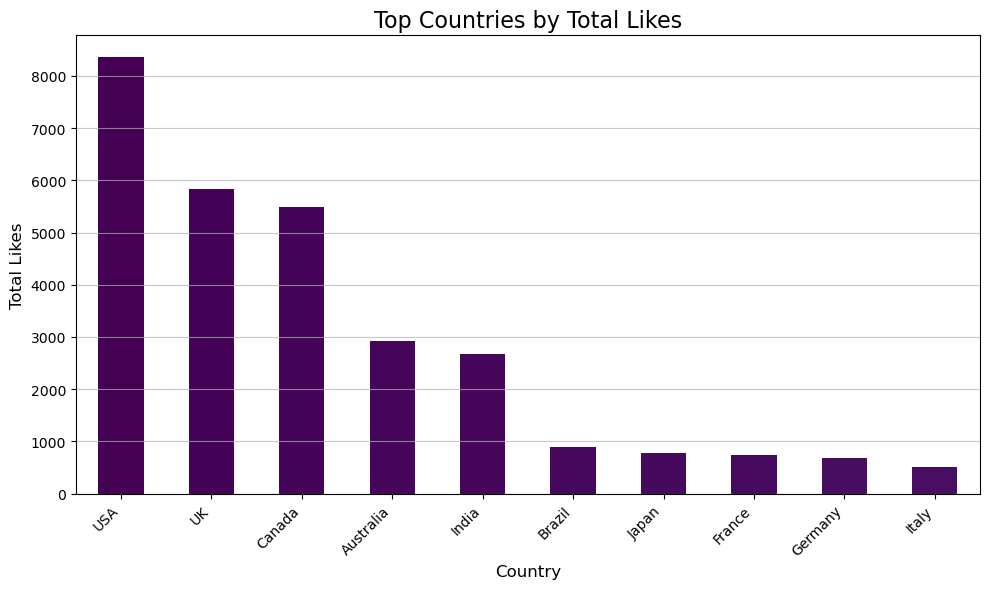

In [30]:
import matplotlib.pyplot as plt

# Group by 'Country' and calculate the sum of 'Likes', then select the top 10 countries
top_country_likes = df.groupby('Country')['Likes'].sum().nlargest(10)

# Selecting colors from the 'viridis' colormap
colors = plt.cm.viridis(range(len(top_country_likes)))

# Create the bar chart with enhanced aesthetics
plt.figure(figsize=(10, 6))
top_country_likes.plot(kind='bar', color=colors)

# Add title and labels
plt.title('Top Countries by Total Likes', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Likes', fontsize=12)

# Customize ticks and grid lines
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


###  Segmenting users for each platform

In [31]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

## Facebook

### Top 10 hashtags retweeted

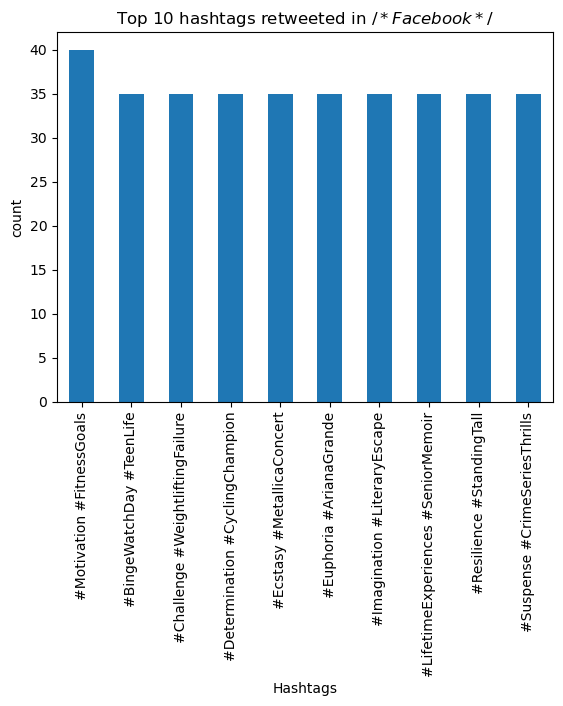

In [32]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar') 
plt.title('Top 10 hashtags retweeted in $/*Facebook*$/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Which User liked mostly

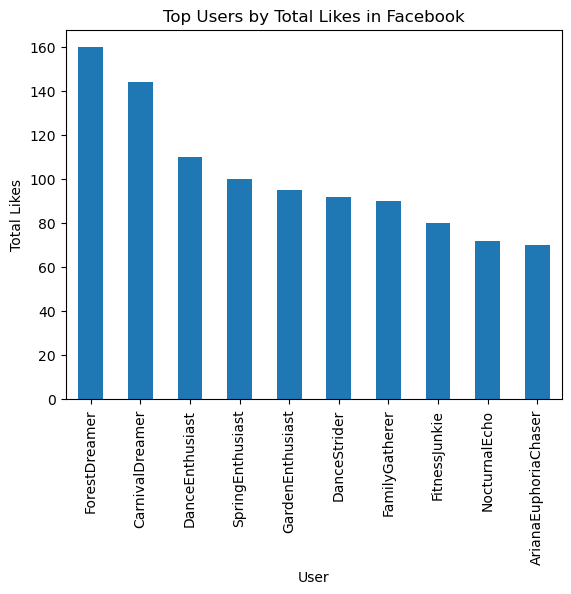

In [33]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes in Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

## Twitter

### Top 10 hashtags retweeted

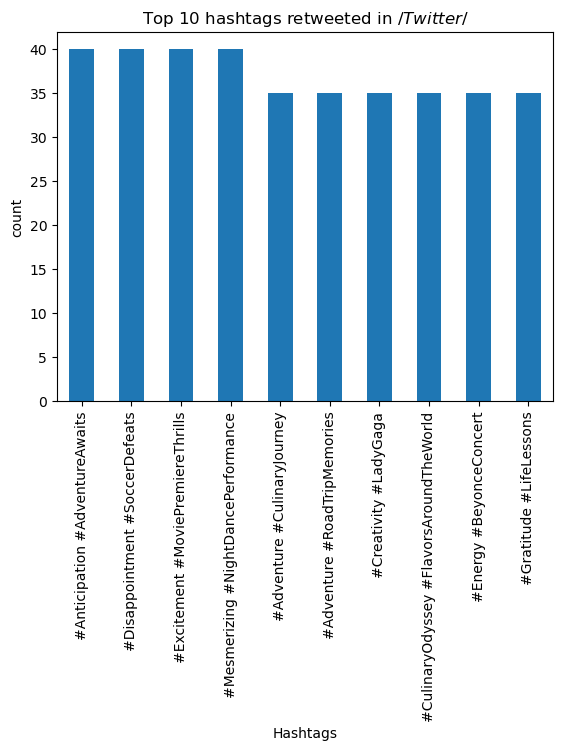

In [34]:
H_R_t=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Who User liked mostly

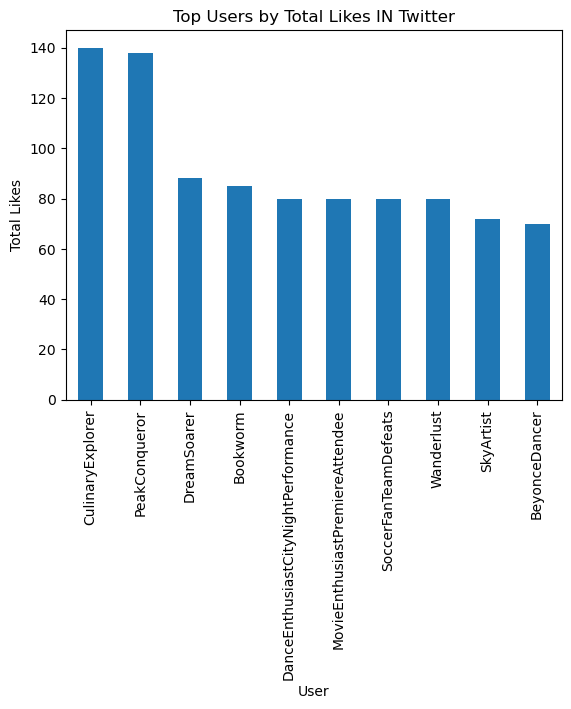

In [35]:
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

## Instagram

###  Top 10 hashtags retweeted

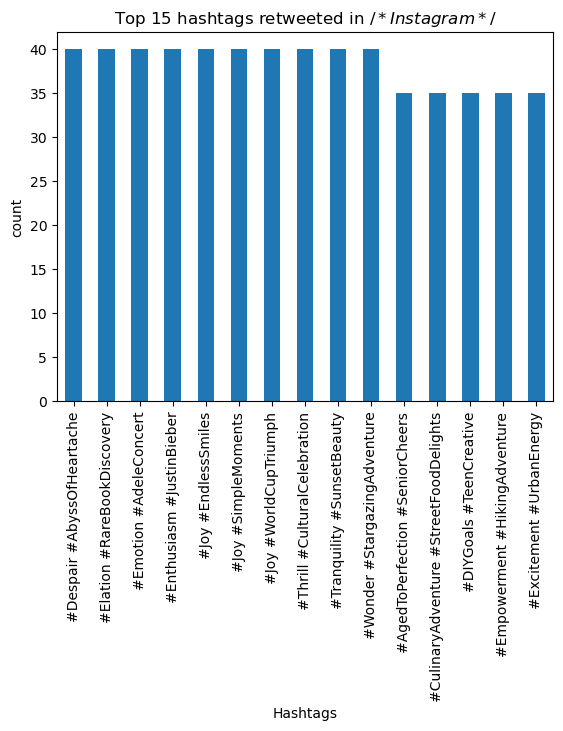

In [36]:
H_R_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ *Instagram* $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

### Which User liked mostly

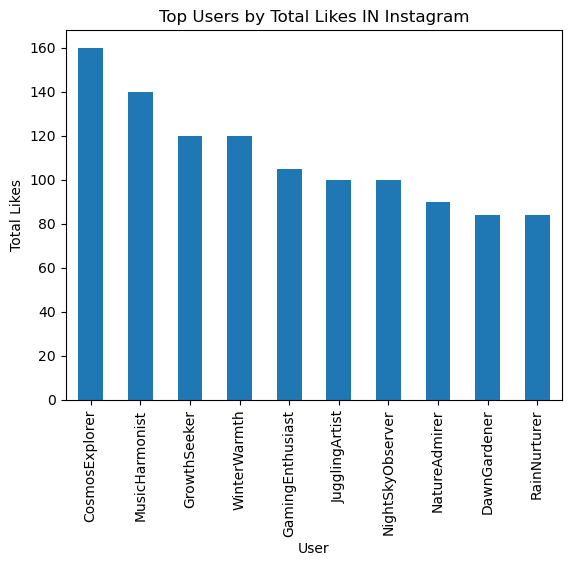

In [37]:
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top Users by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

## Month 

In [38]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

## Text

In [39]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)

# Sentiment Analysis

In [40]:
df1 = df.copy()

In [41]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                     Clean_Text  Vader_Score Sentiment
0         enjoy beauti day park       0.4939  positive
1          traffic terribl morn       0.0000   neutral
2           finish amaz workout       0.0000   neutral
3   excit upcom weekend getaway       0.0000   neutral
4  tri new recip dinner tonight       0.0000   neutral


## Relationship B/w Years & Sentiments 

In [42]:
#df['Year'] = df['Timestamp'].dt.year

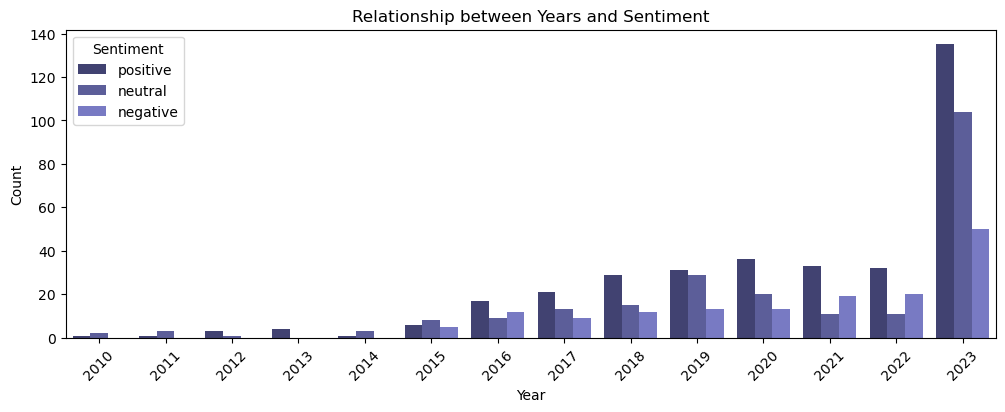

In [43]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='tab20b')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Relationship B/w Months & Sentiments 
 

In [44]:
#df['Month'] = df['Timestamp'].dt.month

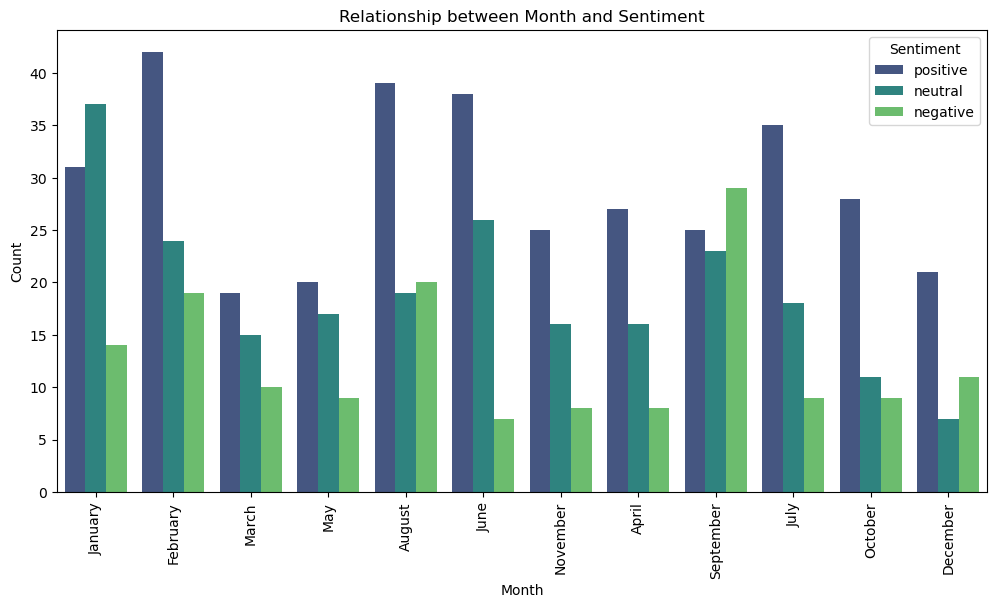

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='viridis')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Relationship B/w Days & Sentiments 


In [46]:
#df['Day'] = df['Timestamp'].dt.day

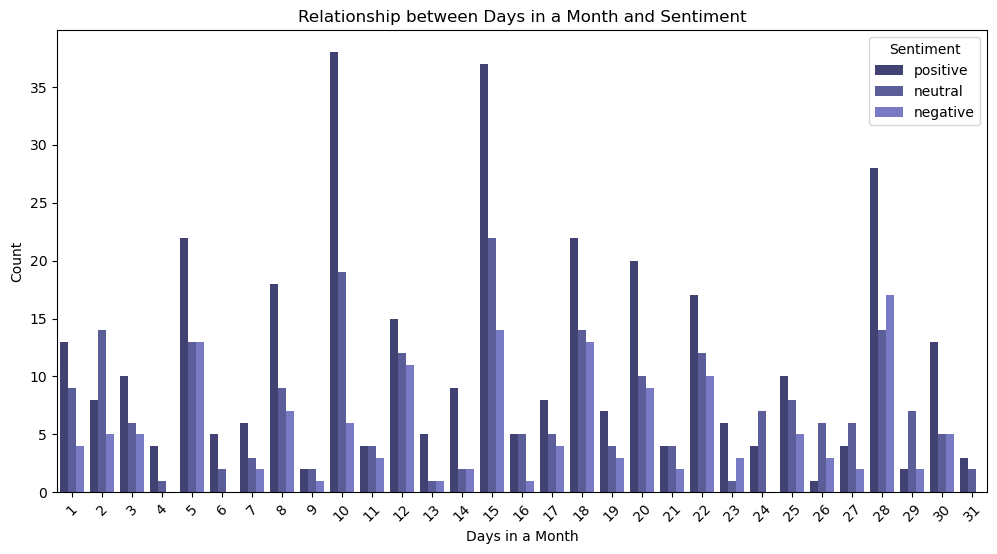

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', hue='Sentiment', data=df1, palette='tab20b')
plt.title('Relationship between Days in a Month and Sentiment')
plt.xlabel('Days in a Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##  Relationship B/w Day of Week & Sentiments 
 

In [48]:
#df['Day_of_Week'] = df['Timestamp'].dt.day_name()

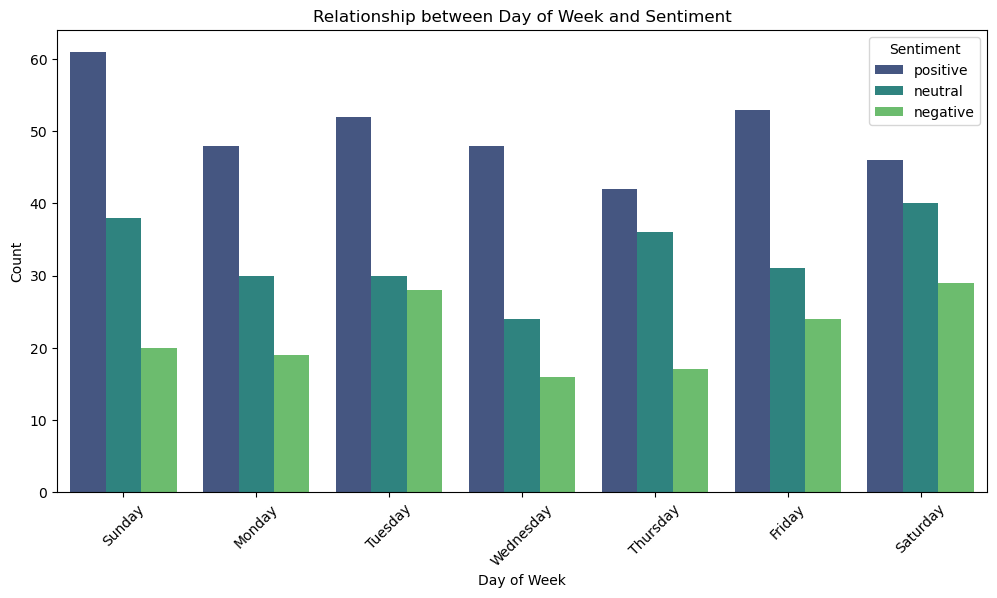

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='viridis')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##  Relationship B/w Platform & Sentiments 

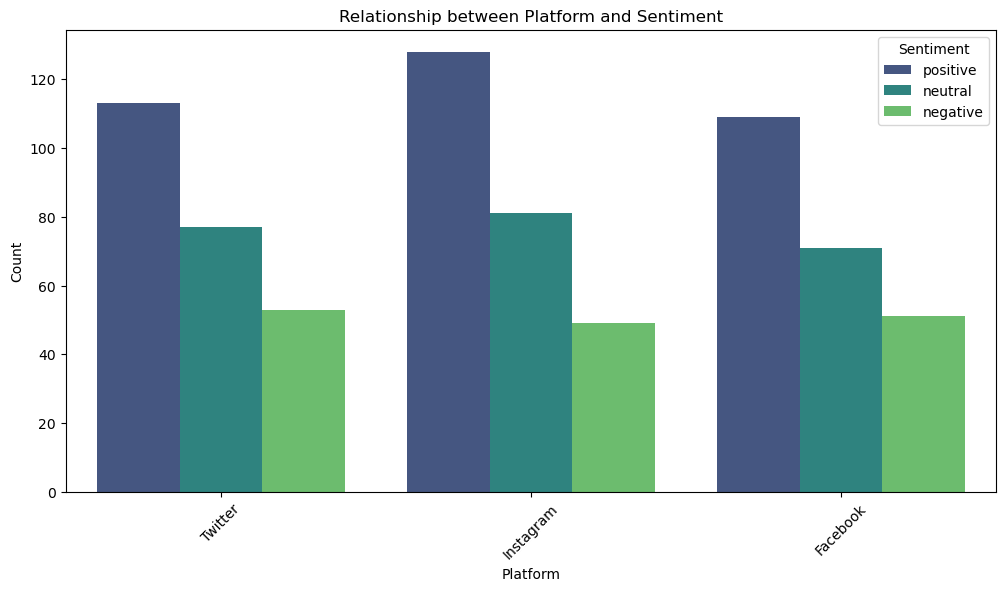

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='viridis')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Common Words 

In [57]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


## Word Count 

In [58]:
Positive_sent = df1[df1['Sentiment'] == 'positive']
Negative_sent = df1[df1['Sentiment'] == 'negative']
Neutral_sent = df1[df1['Sentiment'] == 'neutral']

### Positive Common Words 

In [59]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,joy,30
1,friend,24
2,laughter,24
3,new,21
4,challeng,20
5,life,20
6,hope,20
7,dream,20
8,embrac,19
9,like,19


### Neutral Common Words

In [60]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,new,22
1,explor,13
2,excit,12
3,life,12
4,beauti,12
5,night,12
6,danc,12
7,attend,11
8,seren,11
9,feel,10


### Negative Common Words 

In [61]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,despair,14
1,lost,14
2,emot,13
3,feel,11
4,bitter,10
5,storm,10
6,day,9
7,like,9
8,grief,8
9,heart,8


## Data Preparation

In [62]:
df2 = df1.copy()

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

### Splitting the Data 

In [69]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling 

In [71]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

##  SVM Classifier

In [72]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [73]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [74]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Results:
Accuracy: 0.5986394557823129
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.38      0.55        32
     neutral       0.94      0.31      0.47        55
    positive       0.50      0.98      0.67        60

    accuracy                           0.60       147
   macro avg       0.82      0.56      0.56       147
weighted avg       0.78      0.60      0.57       147



### Random Forest Classifier 

In [75]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [76]:
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [77]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.6530612244897959
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.59      0.70        32
     neutral       0.77      0.44      0.56        55
    positive       0.56      0.88      0.69        60

    accuracy                           0.65       147
   macro avg       0.73      0.64      0.65       147
weighted avg       0.71      0.65      0.64       147



### Multinomial Naive Bayes

In [78]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [79]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

In [80]:
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.38      0.55        32
     neutral       0.90      0.35      0.50        55
    positive       0.53      1.00      0.69        60

    accuracy                           0.62       147
   macro avg       0.81      0.57      0.58       147
weighted avg       0.77      0.62      0.59       147



### Best Modeling : Random Forest Classifier

In [81]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}


In [82]:
RF_classifier = RandomForestClassifier(random_state=42)

randomized_search = RandomizedSearchCV(RF_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [83]:
best_params_randomized = randomized_search.best_params_
best_params_randomized

{'n_estimators': 100, 'max_depth': None}

In [84]:
best_RF_classifier_randomized = RandomForestClassifier(random_state=42, **best_params_randomized)
best_RF_classifier_randomized.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [85]:
y_pred_best_RF_randomized = best_RF_classifier_randomized.predict(X_test_tfidf)

In [86]:
accuracy_best_RF_randomized = accuracy_score(y_test, y_pred_best_RF_randomized)
classification_rep_best_RF_randomized = classification_report(y_test, y_pred_best_RF_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_RF_randomized)

In [87]:
print("Best RandomForestClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_RF_randomized}")
print("Classification Report:\n", classification_rep_best_RF_randomized)

Best RandomForestClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'n_estimators': 100, 'max_depth': None}
Accuracy: 0.6530612244897959
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.59      0.70        32
     neutral       0.77      0.44      0.56        55
    positive       0.56      0.88      0.69        60

    accuracy                           0.65       147
   macro avg       0.73      0.64      0.65       147
weighted avg       0.71      0.65      0.64       147



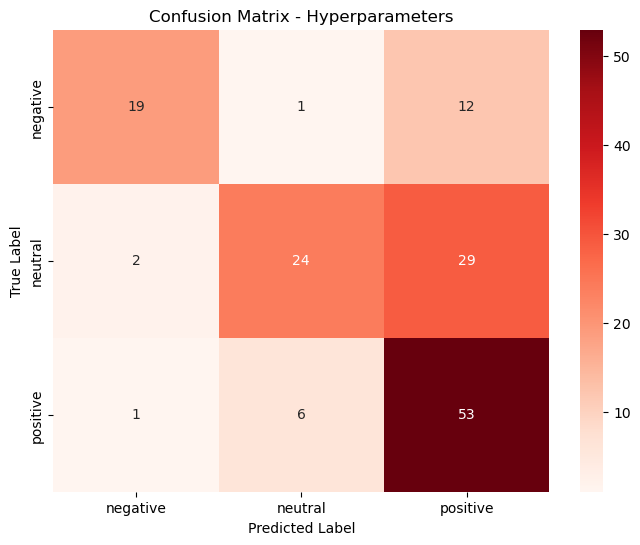

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()